# TP1 SUBE 2023

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt

# Procesamiento de datos

### 1

In [48]:
sube_2023 = pd.read_csv("sube-2023.csv")
sube_2023.head()

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO


##### Transformar la columna DIA_TRANSPORTE para que sea reconocida como una fecha.

In [49]:
sube_2023_fecha =sube_2023.rename(columns={"DIA_TRANSPORTE" : "FECHA"})
sube_2023_fecha.head()

,FECHA,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO


##### Agregar tres columnas al DataFrame:
* FECHA_DIA 
* FECHA_ORDINAL
* FECHA_MES

In [50]:
sube_2023_fecha['FECHA'] = pd.to_datetime(sube_2023_fecha['FECHA'])
sube_2023_fecha["DIA_TRANSPORTE"] = sube_2023_fecha["FECHA"].dt.strftime('%a').str[:3]
sube_2023_fecha["FECHA_ORDINAL"] = sube_2023_fecha["FECHA"].dt.dayofyear
sube_2023_fecha["FECHA_MES"] = sube_2023_fecha["FECHA"].dt.strftime('%m')
sube_2023_fecha.head()

,FECHA,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,DIA_TRANSPORTE,FECHA_ORDINAL,FECHA_MES
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO,Sun,1,01
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO,Sun,1,01
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO,Sun,1,01
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO,Sun,1,01
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO,Sun,1,01


### 2

##### Crear el DataFrame datos_amba

In [66]:
restricciones = (sube_2023_fecha["AMBA"] == "SI") & (sube_2023_fecha["DATO_PRELIMINAR"]== "NO")
#DEBE TENER DATOS DEL AMBA, Y NO DEBE TENER DATOS PRELIMINARES.
sube_2023_fecha_ = sube_2023_fecha[restricciones].copy()
data = {
    "fecha": sube_2023_fecha_["FECHA"],
    "fecha_dia": sube_2023_fecha_["DIA_TRANSPORTE"],
    "fecha_mes" : sube_2023_fecha_["FECHA_MES"],
    "fecha_ordinal": sube_2023_fecha_["FECHA_ORDINAL"],
    "jurisdiccion" :sube_2023_fecha_["JURISDICCION"],
    "linea" :sube_2023_fecha_["LINEA"],
    "pasajeros" :sube_2023_fecha_["CANTIDAD"],
    "tipo_transporte" :sube_2023_fecha_["TIPO_TRANSPORTE"]
}
datos_amba = pd.DataFrame(data)
datos_amba.head()

#PREGUNTAR LO DE LAS TRES LETRAS DEL DIA 

,fecha,fecha_dia,fecha_mes,fecha_ordinal,jurisdiccion,linea,pasajeros,tipo_transporte
0,2023-01-01,Sun,01,1,MUNICIPAL,1,61,COLECTIVO
1,2023-01-01,Sun,01,1,MUNICIPAL,2B,11,COLECTIVO
3,2023-01-01,Sun,01,1,PROVINCIAL,BS_AS_LINEA_326,438,COLECTIVO
5,2023-01-01,Sun,01,1,MUNICIPAL,BS_AS_LINEA_514,3067,COLECTIVO
6,2023-01-01,Sun,01,1,MUNICIPAL,BS_AS_LINEA_522,332,COLECTIVO


### 3

##### Identificar:
* La proporción de la cantidad total anual de pasajeros que le corresponde a cada medio de transporte
* La tupla (mes, línea de subte) donde viajó la mayor cantidad de pasajeros
* El día hábil con menor desvío estándar en cantidad de pasajeros

In [80]:
pasajeros_por_transporte = datos_amba.groupby("tipo_transporte")["pasajeros"].sum()

total_pasajeros = pasajeros_por_transporte.sum()

proporcion_pasajeros_por_transporte = pasajeros_por_transporte / total_pasajeros

print("Proporción de la cantidad total anual de pasajeros por tipo de transporte:")
print(proporcion_pasajeros_por_transporte)
print()
print("Cantidad total anual de pasajeros por tipo de transporte:", total_pasajeros)
print(pasajeros_por_transporte)


Proporción de la cantidad total anual de pasajeros por tipo de transporte:
tipo_transporte
COLECTIVO    0.837645
SUBTE        0.068097
TREN         0.094258
Name: pasajeros, dtype: float64

Cantidad total anual de pasajeros por tipo de transporte: 3518818971
tipo_transporte
COLECTIVO    2947520678
SUBTE         239621028
TREN          331677265
Name: pasajeros, dtype: int64


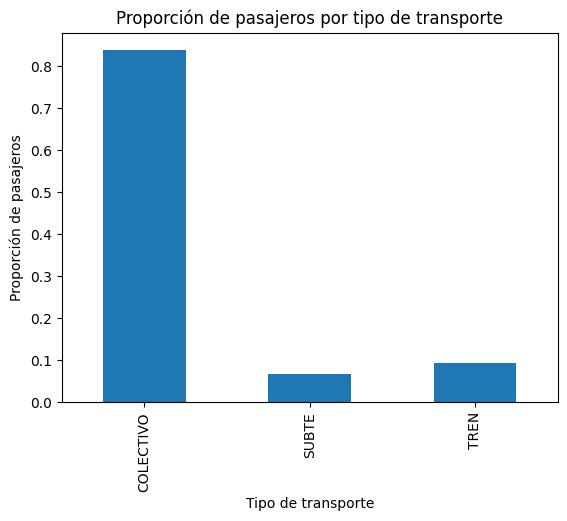

In [111]:
fig, ax = plt.subplots()

proporcion_pasajeros_por_transporte.plot(kind='bar', ax=ax)

ax.set_title('Proporción de pasajeros por tipo de transporte')
ax.set_xlabel('Tipo de transporte')
ax.set_ylabel('Proporción de pasajeros')

plt.show()

In [100]:
datos_subte = datos_amba[datos_amba["tipo_transporte"] == "SUBTE"]
pasajeros_por_mes_y_linea = datos_subte.groupby(["fecha_mes", "linea"])["pasajeros"].sum()
mayor_cantidad_pasajeros = pasajeros_por_mes_y_linea.idxmax()

print("La tupla (mes, línea de subte) donde viajó la mayor cantidad de pasajeros es:", mayor_cantidad_pasajeros)

La tupla (mes, línea de subte) donde viajó la mayor cantidad de pasajeros es: ('08', 'LINEA_B')


In [109]:
dias_habiles = datos_amba[(datos_amba["fecha_dia"] != "Sun") & (datos_amba["fecha_dia"] != "Sat")]
pasajeros_por_dia = dias_habiles.groupby("fecha_dia")["pasajeros"].std()
dia_con_menor_concurrencia = pasajeros_por_dia.idxmin()
cantidad_de_pasajeros = dias_habiles[dias_habiles["fecha_dia"] == dia_con_menor_concurrencia]["pasajeros"].sum()
print("El dia habil con menos concurencia en el transporte publico es", dia_con_menor_concurrencia, "con", cantidad_de_pasajeros, "pasajeros")


El dia habil con menos concurencia en el transporte publico es Mon con 540161948 pasajeros


Text(0, 0.5, 'Dia')

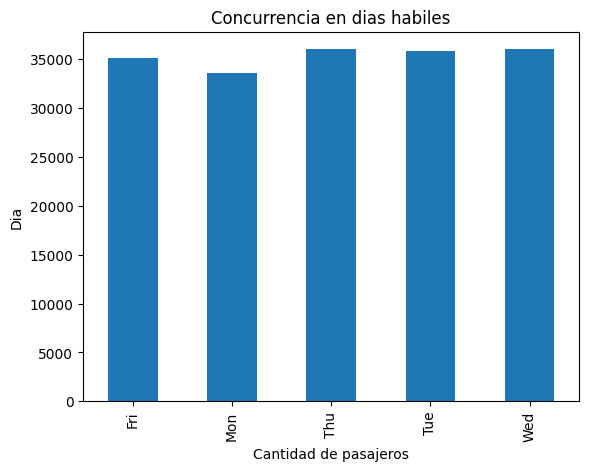

In [119]:
fig, ax = plt.subplots()

pasajeros_por_dia.plot(kind='bar', ax=ax)

ax.set_title('Concurrencia en dias habiles')
ax.set_xlabel('Cantidad de pasajeros')
ax.set_ylabel('Dia')

# Análisis Exploratorio

### 4
